In [ ]:

#  ______________________________________ SETTING THE ENVIRONMENT ________________________________
import datetime
import io
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import analyzer
import columns
import devices
import frontend
import plots
import prints
import sadzax
sadzax.Out.reconfigure_encoding()
sadzax.Out.clear_future_warning()


#  ______________________________________ OBTAINING DATA _________________________________________
prints.info('Установление параметров для анализа')

device_type = prints.device_picking()
# device_type = 'mon'
dev = device_type
# prints.file_picking(dev)
# data = devices.Pkl.load(dev)
[data, used_files] = analyzer.stack_data(dev)
cols_list = columns.columns_list_maker(dev, data)
cols = columns.columns_analyzer(dev, cols_list)
del cols_list
data = analyzer.pass_the_nan(device_type=device_type, data=data, cols=cols)  # update data_types
data = analyzer.set_dtypes(device_type=device_type, data=data, cols=cols)
# devices.Pkl.save(device_type=device_type, data=data)


In [ ]:
pass

In [72]:
pass

In [71]:
pass

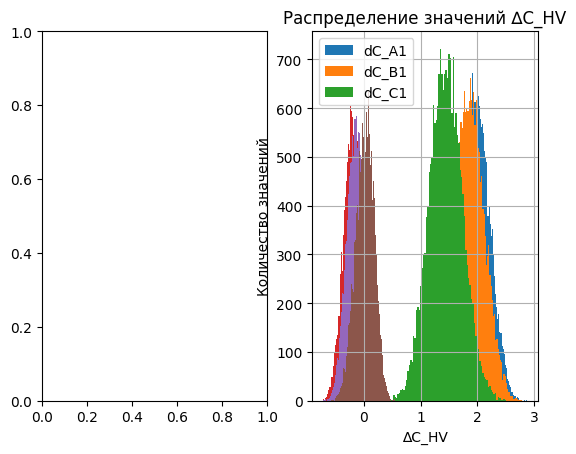

In [84]:
fig, axes = plt.subplots(1, 2)
axes[0] = plots.histogram(value=['∆C_MV'], bins=99,data=data,cols=cols, title=f'Распределение значений ∆C_MV')
# axes[0].plot(range(3), range(3))
axes[1] = plots.histogram(value=['∆C_HV'], bins=99,data=data,cols=cols, title=f'Распределение значений ∆C_HV')

In [76]:
pass

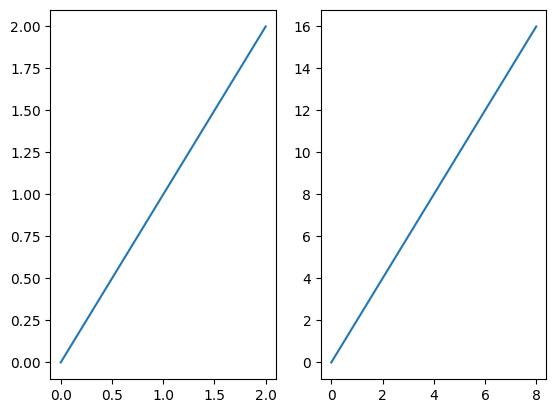

In [82]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(range(3), range(3))
axes[1].plot(range(9), [2*x for x in range(9)])